In [1]:
import sys
sys.path.append('../src')
import exlib

In [2]:
import torch
import torchvision
import torch.nn.functional as F
import shap

model = torchvision.models.mobilenet_v2(pretrained=True, progress=False)
model = model.cuda()
model.eval()
X, y = shap.datasets.imagenet50()

X = torch.from_numpy(X).permute(0,3,1,2).float()[0:1]
X.shape
# y = torch.from_numpy(y).long()[0:2] #these labels are garbage

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.


torch.Size([1, 3, 224, 224])

In [3]:
from exlib.explainers.lime import LimeImageCls
from exlib.explainers.common import patch_segmenter
from exlib.evaluators.attributions import NNZ


eik = {
    "segmentation_fn": patch_segmenter,
    "top_labels": 1000, 
    "hide_color": 0, 
    "num_samples": 1000
}
gimk = {
    "positive_only": False
}
explainer = LimeImageCls(model, 
                      explain_instance_kwargs=eik, 
                      get_image_and_mask_kwargs=gimk)
evaluator = NNZ()
expln = explainer(X, torch.tensor([0]))
evaluator(X,expln.attributions, normalize=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)


tensor([1.])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


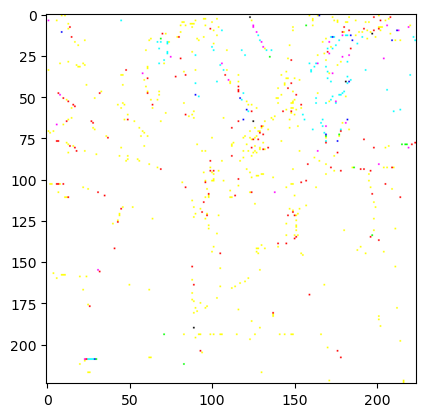

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X[0].permute(1,2,0).cpu().numpy())

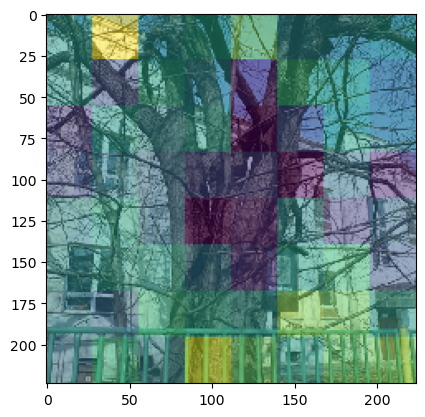

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X[0].permute(1,2,0).cpu().numpy() / 255)
plt.imshow(expln.attributions[0][0], alpha=0.5)

In [21]:
expln.explainer_output[0].__dict__.keys()

dict_keys(['image', 'segments', 'intercept', 'local_exp', 'local_pred', 'top_labels', 'score'])

In [29]:
expln.attributions.shape, expln.explainer_output[0].segments.shape

(torch.Size([2, 3, 224, 224]), (224, 224))

In [34]:
masks = []
mask_weights = []
attributions = torch.zeros_like(expln.attributions[0][0]).float()

for e_i, (k, v) in enumerate(sorted(expln.explainer_output[0].local_exp[t], key=lambda item: item[1], reverse=True)):
    attributions[expln.explainer_output[0].segments==k] = v

In [31]:
attributions

tensor([[[ 0.1385,  0.1385,  0.1385,  ...,  0.1273,  0.1273,  0.1273],
         [ 0.1385,  0.1385,  0.1385,  ...,  0.1273,  0.1273,  0.1273],
         [ 0.1385,  0.1385,  0.1385,  ...,  0.1273,  0.1273,  0.1273],
         ...,
         [-0.0864, -0.0864, -0.0864,  ...,  0.1694,  0.1694,  0.1694],
         [-0.0864, -0.0864, -0.0864,  ...,  0.1694,  0.1694,  0.1694],
         [-0.0864, -0.0864, -0.0864,  ...,  0.1694,  0.1694,  0.1694]],

        [[ 0.1385,  0.1385,  0.1385,  ...,  0.1273,  0.1273,  0.1273],
         [ 0.1385,  0.1385,  0.1385,  ...,  0.1273,  0.1273,  0.1273],
         [ 0.1385,  0.1385,  0.1385,  ...,  0.1273,  0.1273,  0.1273],
         ...,
         [-0.0864, -0.0864, -0.0864,  ...,  0.1694,  0.1694,  0.1694],
         [-0.0864, -0.0864, -0.0864,  ...,  0.1694,  0.1694,  0.1694],
         [-0.0864, -0.0864, -0.0864,  ...,  0.1694,  0.1694,  0.1694]],

        [[ 0.1385,  0.1385,  0.1385,  ...,  0.1273,  0.1273,  0.1273],
         [ 0.1385,  0.1385,  0.1385,  ...,  0

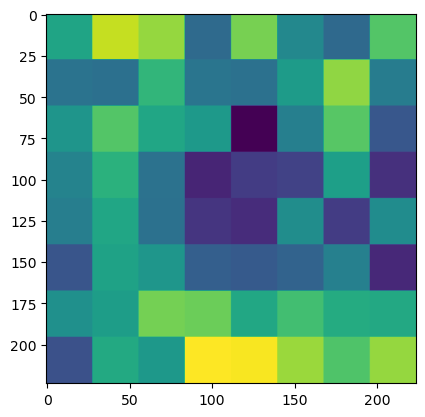

In [5]:
import matplotlib.pyplot as plt
plt.imshow(expln.attributions[0][0])

In [27]:
t = 0
len(expln.explainer_output[0].local_exp[t])

64

In [24]:
expln.explainer_output[0].local_exp

{346: [(37, 0.2739363405652259),
  (4, 0.26929944907391673),
  (28, 0.24438966270559134),
  (1, 0.2354289069207453),
  (45, 0.17996526483756792),
  (49, -0.1740311913251686),
  (63, 0.17048599615947818),
  (2, 0.17046405699345885),
  (34, 0.1606409095526128),
  (36, 0.15561172188746342),
  (21, 0.1511387085717645),
  (18, 0.14553390318847276),
  (9, -0.13782753708421175),
  (15, -0.13049164552148682),
  (29, 0.11467617325750983),
  (44, 0.11058953327550544),
  (42, 0.10384577688060799),
  (27, 0.10252136081183895),
  (22, 0.09435627863688671),
  (35, 0.09420734802955674),
  (62, -0.08716581072636423),
  (24, 0.08642782488925842),
  (54, -0.0809493679075165),
  (41, -0.07705556970653393),
  (59, -0.07146129906981472),
  (57, 0.07070804763855042),
  (25, 0.07022753418796963),
  (20, 0.06348002068623754),
  (10, -0.0627745857643253),
  (33, 0.0625557603461637),
  (26, 0.06216637176025188),
  (55, -0.0580827306701809),
  (8, -0.055115489708491276),
  (16, 0.05337771245014465),
  (6, -0.049

In [14]:
X.shape

torch.Size([2, 3, 224, 224])

In [ ]:
expln.explainer_output

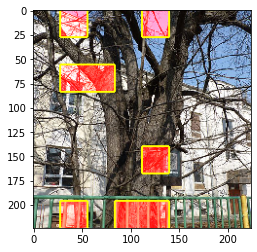

In [4]:
from skimage.segmentation import mark_boundaries
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

explanation = expln.explainer_output[0]

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=8, hide_rest=False)
X_min, X_max = temp.min(), temp.max()
img_boundry1 = mark_boundaries((temp-X_min)/(X_max-X_min), mask)
plt.imshow(img_boundry1, vmin=0, vmax=1, cmap='bwr')

In [5]:
explainer = TorchImageSHAP(model)
expln = explainer(X)
evaluator(X,expln.attributions, normalize=True)

 68%|████████████████████████████████████████████████████████████▊                            | 340/498 [00:00<00:00, 2098.33it/s]
Partition explainer: 3it [00:18,  9.04s/it]                                                                                       


tensor([0.9844, 1.0000])